# Natural Language Processing

In [5]:
data = [('Big data', 100, 15),
        ('Hadoop', 95, 25),
        ('Python', 75, 50),
        ('R', 50, 40),
        ('Machine Learning', 80, 20),
        ('Statistics', 20, 60),
        ('Data Science', 60, 70),
        ('analytics', 90, 3),
        ('Team Player', 85, 85),
        ('dynamic', 2, 90),
        ('synergier', 70, 0),
        ('actionable insights', 40, 30),
        ('think out of the box', 45, 10),
        ('self-starter', 30, 50),
        ('customer focus', 65, 15),
        ('thought leadership', 35, 35)]

In [6]:
from matplotlib import pyplot as plt

In [7]:
def text_size(total: int) -> float:
    '''equals 8 if total is 0, 28 if total is 200'''
    return 8 + total / 200 * 20

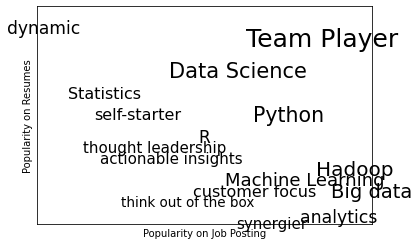

In [9]:
for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
        ha='center', va='center', size = text_size(job_popularity+resume_popularity))

plt.xlabel('Popularity on Job Posting')
plt.ylabel('Popularity on Resumes')
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

## N-Gram Language Models

In [14]:
def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

In [15]:
import re
from bs4 import BeautifulSoup
import requests

In [61]:
url = "https://www.oreilly.com/ideas/what-is-data-science" 

In [62]:
html = requests.get(url).text

In [63]:
soup = BeautifulSoup(html, 'html5lib')
content = soup.find("div", "main-post-radar-content")
regrex = r"[\w']+|[\.]"

In [64]:
document = []

for para in content("p"):
    words = re.findall(regrex, fix_unicode(para.text))
    document.extend(words)

In [65]:
document = document[103:].copy()

In [68]:
from collections import defaultdict

In [69]:
transitions = defaultdict(list)

In [70]:
for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)

In [72]:
def generate_using_bigrams() -> str:
    current = '.'
    result = []
    
    while True:
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates)
        result.append(current)

        if current == '.': return " ".join(result)
        

In [73]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):
    if prev == '.':
        '''if the previous word was a period then this is a start word'''
        starts.append(current)
    trigram_transitions[(prev, current)].append(next)

In [76]:
def generate_using_trigrams() -> str:
    current = random.choice(starts)
    prev = '.'
    result = [current]

    while True:
        next_word_cadndidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_cadndidates)
        prev, current = current, next_word
        result.append(current)

        if current == '.':
            return " ".join(result)

## Grammars

In [77]:
from typing import List, Dict

In [88]:
Grammar = Dict[str, List[str]]

grammar = {
    "_S": ["_NP _VP"],
    "_NP": ["_N",
             "_A _NP _P _A _N"],
    "_VP": ["_V",
             "_V _NP"],
    "_N": ["data science", "Python", "regression"],
    "_A": ["big", "linear", "logistic"],
    "_P": ["about", "near"],
    "_V": ["learns", "trains", "tests", "is"] }


In [89]:
def is_terminal(token: str) -> bool:
    return token[0] != "_"

In [90]:
def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        if is_terminal(token): continue
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        
        return expand(grammar, tokens)

    return tokens

In [91]:
def generate_sentance(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])